# 분류, 회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [3]:
df=pd.read_csv(path, header=None)

1. sepal length in cm  
2. sepal width in cm  
3. petal length in cm  
4. petal width in cm  
5. class:  
-- Iris Setosa  
-- Iris Versicolour  
-- Iris Virginica  

In [4]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.columns= df.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

In [8]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
X = df.drop('species',axis=1).to_numpy()

In [10]:
y=df['species'].to_numpy()

In [11]:
set(y)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [12]:
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2)) 

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
X = X[:,2:]

# 11.03 데이터 분할(훈련용 vs 테스트용)

In [15]:
X.shape

(150, 2)

In [16]:
y.shape

(150,)

In [17]:
from sklearn.model_selection import train_test_split

    stratify -> 분포를 정확하게 나눠줌

In [18]:
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size = 0.7, random_state=1, stratify = y)

In [19]:
X_train.shape

(105, 2)

In [20]:
y_train.shape

(105,)

In [21]:
pd.Series(y_train).value_counts()

0    35
1    35
2    35
dtype: int64

In [22]:
pd.Series(y_test).value_counts()

0    15
1    15
2    15
dtype: int64

x축 : 꽃잎의 길이(0번째 칼럼)  
y축 : 꽃잎의 너비(1번째 칼럼)  
품종별로 다른 색으로 표시하기

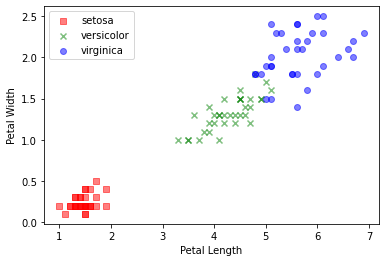

In [23]:
ax = plt.axes()
markers = ['s','x','o']
colors = ['r','g','b']
labels = ['setosa', 'versicolor', 'virginica']

for i in range(3):
    X_sub = X_train[y_train == i]
    ax.scatter(X_sub[:,0], X_sub[:,1], alpha = 0.5,
               marker=markers[i], color=colors[i], label=labels[i])
    ax.set(xlabel = 'Petal Length', ylabel = 'Petal Width')
    ax.legend()

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 로지스틱 회귀

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logistic = LogisticRegression()

In [27]:
logistic.fit(X_train_std, y_train)

LogisticRegression()

In [28]:
logistic.predict(X_train_std[:3,:])

array([0, 0, 2])

In [29]:
logistic.predict_proba(X_train_std[:3,:])

array([[9.59543959e-01, 4.04522758e-02, 3.76537919e-06],
       [9.40769396e-01, 5.92226306e-02, 7.97320867e-06],
       [6.25773725e-05, 6.67508339e-02, 9.33186589e-01]])

In [30]:
y_train[:3]

array([0, 0, 2])

In [31]:
logistic.score(X_train_std, y_train) #정확도 (accuracy) = 정분휴율

0.9428571428571428

In [32]:
logistic.score(X_test_std, y_test)

0.9777777777777777

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
y_pred = logistic.predict(X_test_std) #테스트 데이터에 대한 예측 분류값
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

# 11.08

In [35]:
from sklearn.svm import SVC

In [36]:
svc_linear = SVC(kernel = 'linear', C=1.0, random_state=1)

In [37]:
svc_linear.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [38]:
svc_linear.score(X_train_std, y_train)

0.9523809523809523

# 11.10

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
tree = DecisionTreeClassifier(random_state = 1) #default 인수

In [42]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [43]:
tree.score(X_train, y_train)

0.9904761904761905

In [44]:
tree.score(X_test, y_test)

0.9777777777777777

In [45]:
tree.get_depth()

6

In [46]:
tree4 = DecisionTreeClassifier(max_depth = 4, random_state=1)
tree4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [47]:
tree4.score(X_train, y_train)

0.9714285714285714

In [48]:
tree4.score(X_test, y_test)

0.9777777777777777

In [49]:
tree2 = DecisionTreeClassifier(max_depth = 2, random_state=1)

In [50]:
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [51]:
tree2.score(X_test, y_test)

0.9555555555555556

In [52]:
tree3 = DecisionTreeClassifier(max_depth=3, random_state=1)

In [53]:
tree3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [54]:
tree3.score(X_test, y_test)

0.9777777777777777

In [55]:
from sklearn.tree import plot_tree

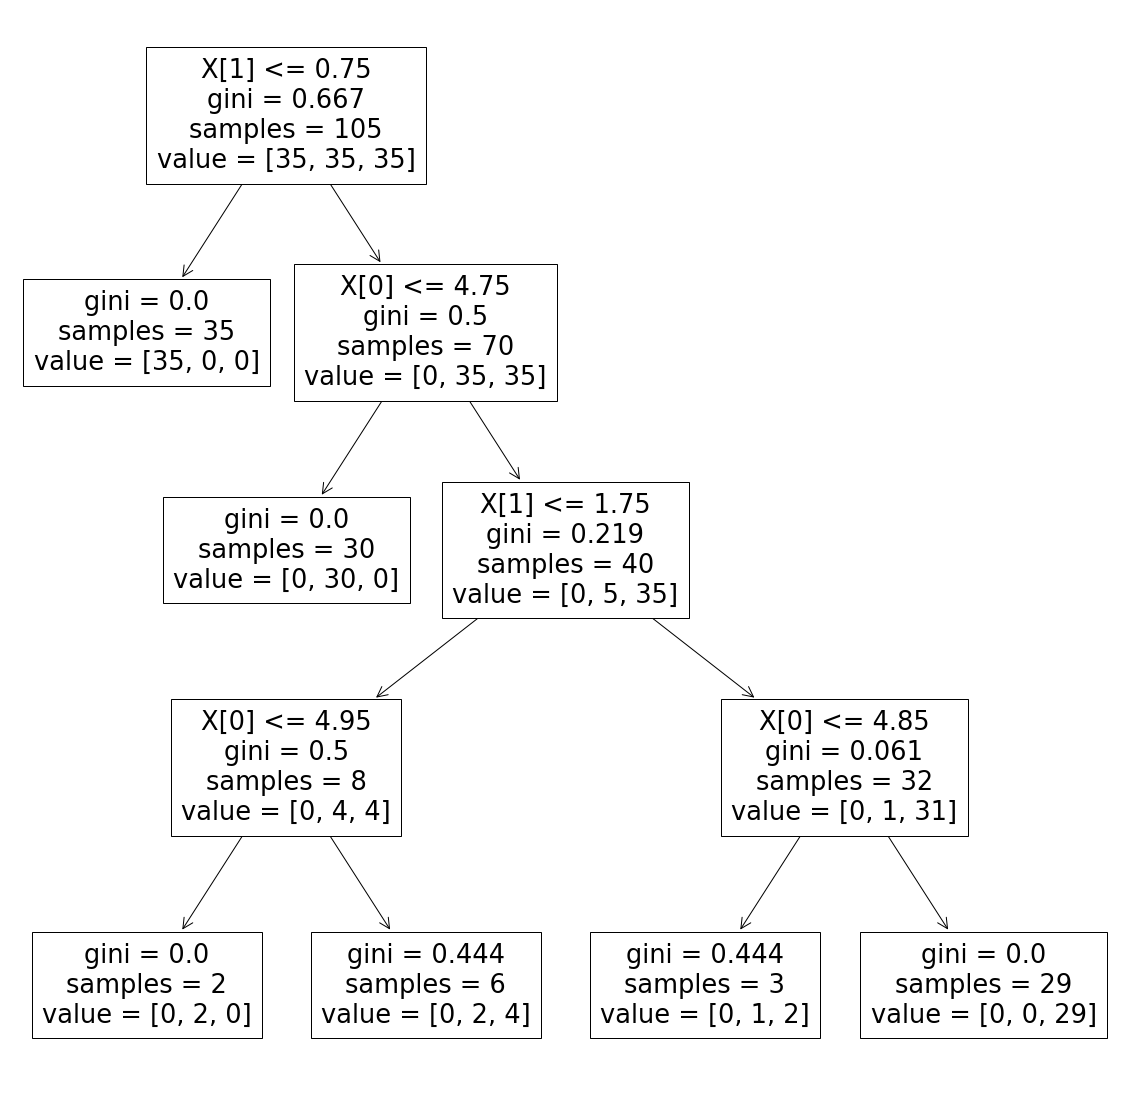

In [63]:
plt.figure(figsize=(20,20))
plot_tree(tree4);

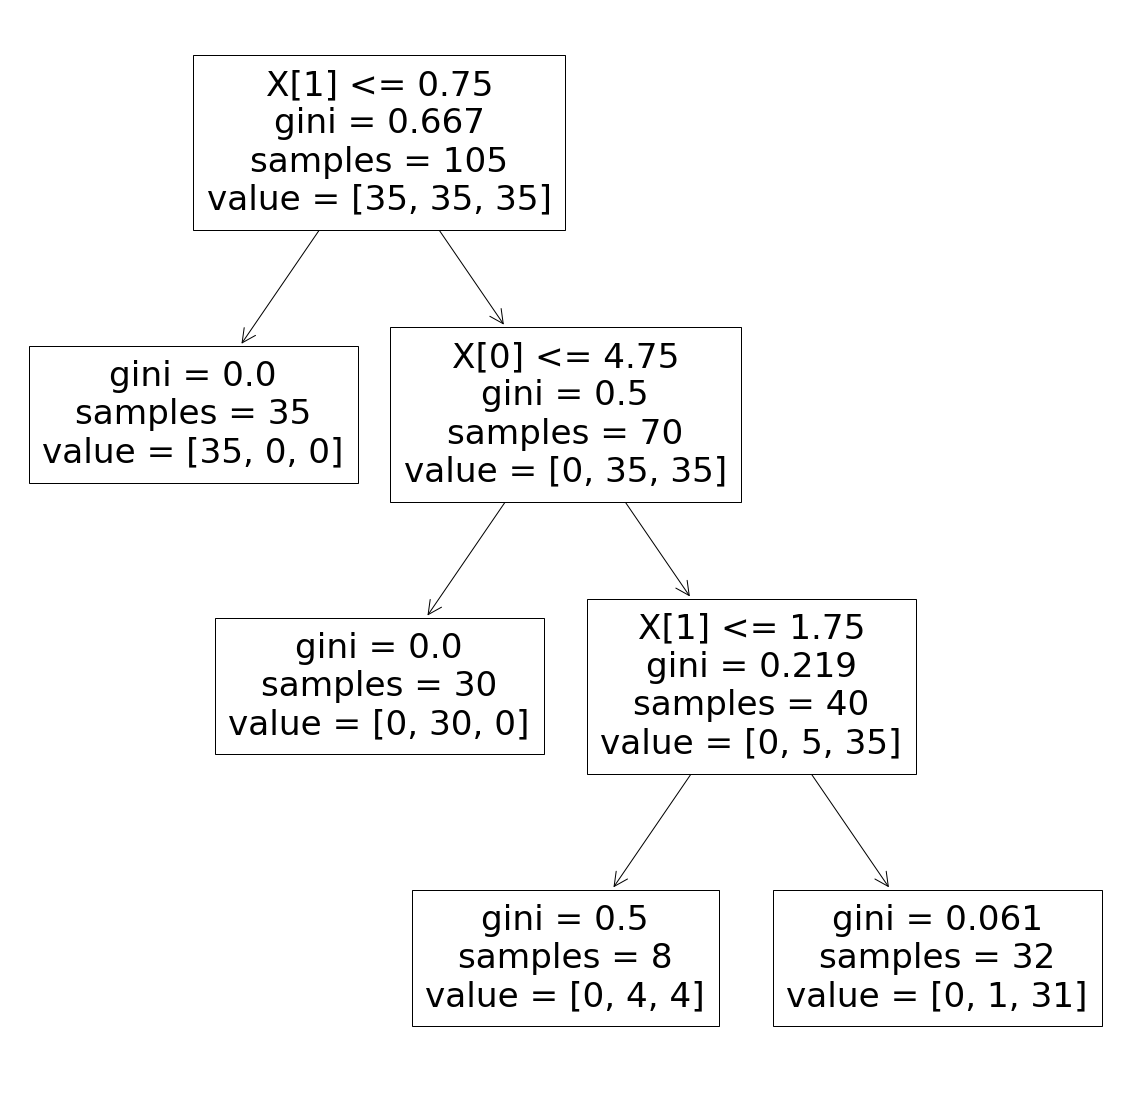

In [64]:
plt.figure(figsize=(20,20))
plot_tree(tree3);

In [65]:
tree4.predict(X_train)

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0])

In [67]:
tree4.predict([[6,1.2]])

array([2])

In [68]:
tree4.feature_importances_

array([0.42708333, 0.57291667])